# Mike's Jupyter Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from collections import Counter
from datetime import datetime
import gmaps
from config import gkey

In [2]:
accident_data_path = 'Resources/CleanedData.json'
acc_df = pd.read_json(accident_data_path)
acc_df.head()

,ID,Criticality,Latitude,Longitude,Start_time,End_time,Duration_(seconds),Vehicle_response,Road_closure,State
0,100372617581716855,minor,33.162394,-87.549211,2019-10-02 03:55:07,2019-10-02 04:25:05,1798,False,False,Alabama
1,4320793649494536642,critical,32.754060,-86.511290,2019-10-03 18:00:28,2019-10-03 18:30:02,1774,False,True,Alabama
10,433454766143288697,minor,33.386590,-111.748610,2019-10-01 13:35:15,2019-10-01 14:03:18,1683,False,False,Arizona
100,483322249055962197,minor,33.928085,-118.340919,2019-10-01 12:47:00,2019-10-01 14:22:59,5759,False,False,California
1000,176787206817732943,minor,33.856856,-118.028743,2019-10-03 11:32:00,2019-10-03 12:04:01,1921,False,False,California


In [3]:
population_data_path = 'Resources/state_population.csv'
pop_df = pd.read_csv(population_data_path)
pop_df.set_index('State', inplace=True)
pop_df.sort_values(by='State', inplace=True)
pop_df.head()

,Population,Density
State,,
Alabama,4898246,97
Alaska,735720,1
Arizona,7275070,64
Arkansas,3026412,58
California,39747267,255


In [4]:
pop_df['Area'] = pop_df['Population'] / pop_df['Density']
pop_df.head()

,Population,Density,Area
State,,,
Alabama,4898246,97,50497.381443
Alaska,735720,1,735720.000000
Arizona,7275070,64,113672.968750
Arkansas,3026412,58,52179.517241
California,39747267,255,155871.635294


In [5]:
state_groups = acc_df.groupby(['State'])
state_groups

In [6]:
state_group_counts = state_groups['ID'].count()
state_counts = []

for state in pop_df.index:
    if state in state_group_counts:
        state_counts.append(state_group_counts[state])
    else:
        state_counts.append(0)

pop_df['Accidents'] = state_counts
pop_df.head()

,Population,Density,Area,Accidents
State,,,,
Alabama,4898246,97,50497.381443,9
Alaska,735720,1,735720.000000,0
Arizona,7275070,64,113672.968750,40
Arkansas,3026412,58,52179.517241,11
California,39747267,255,155871.635294,4550


In [7]:
# Creating a heat map
locations = acc_df[["Latitude", "Longitude"]]
# Plot Heatmap
fig =gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, 
                                 dissipating=False, max_intensity=3,
                                 point_radius=.05)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

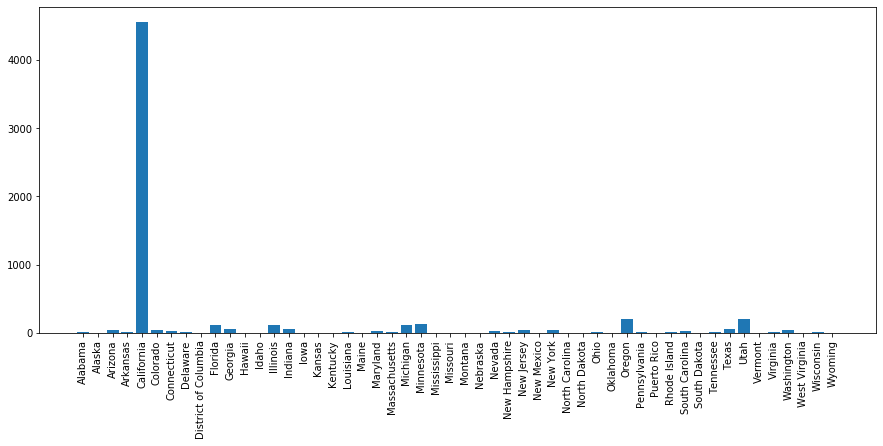

In [8]:
plt.figure(figsize=(15,6))
plt.bar(pop_df.index, pop_df['Accidents'])
plt.xticks(rotation=90)
plt.show()

In [9]:
def getCritValues(criticalities):
    values = []
    for crit_str in criticalities:
        if crit_str == 'critical':
            values.append(0)
        elif crit_str == 'major':
            values.append(1)
        elif crit_str == 'minor':
            values.append(2)
        elif crit_str == 'lowImpact':
            values.append(3)
        else:
            pass
    return values

acc_df['Crit_Value'] = getCritValues(acc_df['Criticality'])
acc_df.head()

,ID,Criticality,Latitude,Longitude,Start_time,End_time,Duration_(seconds),Vehicle_response,Road_closure,State,Crit_Value
0,100372617581716855,minor,33.162394,-87.549211,2019-10-02 03:55:07,2019-10-02 04:25:05,1798,False,False,Alabama,2
1,4320793649494536642,critical,32.754060,-86.511290,2019-10-03 18:00:28,2019-10-03 18:30:02,1774,False,True,Alabama,0
10,433454766143288697,minor,33.386590,-111.748610,2019-10-01 13:35:15,2019-10-01 14:03:18,1683,False,False,Arizona,2
100,483322249055962197,minor,33.928085,-118.340919,2019-10-01 12:47:00,2019-10-01 14:22:59,5759,False,False,California,2
1000,176787206817732943,minor,33.856856,-118.028743,2019-10-03 11:32:00,2019-10-03 12:04:01,1921,False,False,California,2


In [10]:
state_group_crit_averages = state_groups['Crit_Value'].mean()
state_avg_crit_values = []

for state in pop_df.index:
    if state in state_group_crit_averages:
        state_avg_crit_values.append(state_group_crit_averages[state])
    else:
        state_avg_crit_values.append(0)

pop_df['Avg_Criticality'] = state_avg_crit_values
pop_df.head()

,Population,Density,Area,Accidents,Avg_Criticality
State,,,,,
Alabama,4898246,97,50497.381443,9,1.666667
Alaska,735720,1,735720.000000,0,0.000000
Arizona,7275070,64,113672.968750,40,0.650000
Arkansas,3026412,58,52179.517241,11,1.000000
California,39747267,255,155871.635294,4550,1.989231


In [11]:
state_crit_groups = acc_df.groupby(['State','Crit_Value'])
state_crit_groups

In [12]:
state_crit_counts = state_crit_groups['Criticality'].count()
state_crit_counts

State                 Crit_Value
Alabama               0                1
                      1                1
                      2                7
Arizona               0               24
                      1                6
                      2               10
Arkansas              0                2
                      1                7
                      2                2
California            0               18
                      1               13
                      2             4519
Colorado              0                5
                      1               26
                      2               16
Connecticut           0               16
                      1                1
                      2                9
Delaware              0                3
                      2                2
District of Columbia  1                1
Florida               0               34
                      1               25
                      2 

In [28]:
critical_incidents = []  # crit_value 0
major_incidents = []     # crit_value 1
minor_incidents = []     # crit_value 2

for state in pop_df.index:
    for v in range(3):
        key = (state, v)
        if key in state_crit_counts.index:
            if v == 0:
                critical_incidents.append(state_crit_counts[key])
            elif v == 1:
                major_incidents.append(state_crit_counts[key])
            elif v == 2:
                minor_incidents.append(state_crit_counts[key])
            else:
                lowImpact_incidents.append(state_crit_counts[key])
        else:
            if v == 0:
                critical_incidents.append(0)
            elif v == 1:
                major_incidents.append(0)
            elif v == 2:
                minor_incidents.append(0)
            else:
                lowImpact_incidents.append(0)

pop_df['Critical_Count'] = critical_incidents
pop_df['Major_Count'] = major_incidents
pop_df['Minor_Count'] = minor_incidents

pop_df

,Accidents,Avg_Criticality,Critical_Count,Major_Count,Minor_Count,Avg_Duration,Severe_Count
State,,,,,,,
Alabama,9,1.666667,1,1,7,27.777778,2
Alaska,0,0.000000,0,0,0,0.000000,0
Arizona,40,0.650000,24,6,10,28.910417,30
Arkansas,11,1.000000,2,7,2,53.084848,9
California,4550,1.989231,18,13,4519,82.832304,31
Colorado,47,1.234043,5,26,16,39.649291,31
Connecticut,26,0.730769,16,1,9,47.332692,17
Delaware,5,0.800000,3,0,2,27.836667,3
District of Columbia,1,1.000000,0,1,0,29.566667,1


In [14]:
state_durations_mins = state_groups['Duration_(seconds)'].mean() / 60
state_durations_mins

state_durations = []
for state in pop_df.index:
    if state in state_durations_mins:
        state_durations.append(state_durations_mins[state])
    else:
        state_durations.append(0)

pop_df['Avg_Duration'] = state_durations
pop_df.head()

,Population,Density,Area,Accidents,Avg_Criticality,Critical_Count,Major_Count,Minor_Count,Avg_Duration
State,,,,,,,,,
Alabama,4898246,97,50497.381443,9,1.666667,1,1,7,27.777778
Alaska,735720,1,735720.000000,0,0.000000,0,0,0,0.000000
Arizona,7275070,64,113672.968750,40,0.650000,24,6,10,28.910417
Arkansas,3026412,58,52179.517241,11,1.000000,2,7,2,53.084848
California,39747267,255,155871.635294,4550,1.989231,18,13,4519,82.832304


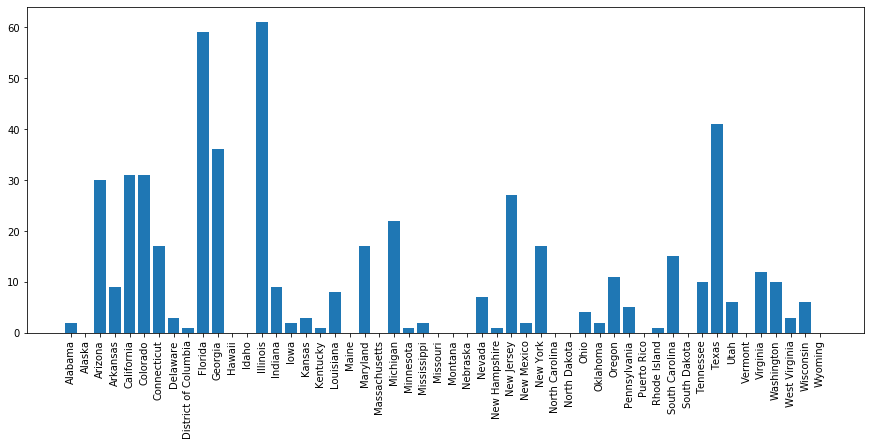

In [15]:
pop_df['Severe_Count'] = pop_df['Critical_Count'] + pop_df['Major_Count']

plt.figure(figsize=(15,6))
plt.bar(pop_df.index, pop_df['Severe_Count'])
plt.xticks(rotation=90)
plt.show()

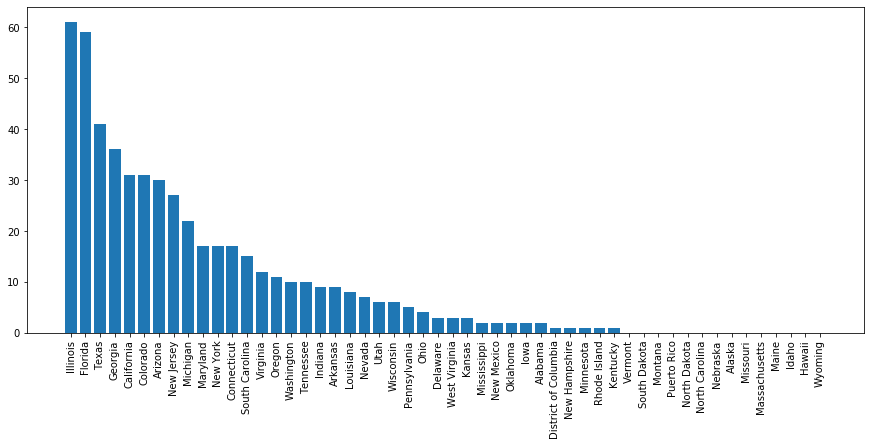

In [16]:
count_sorted_pop_df = pd.DataFrame(pop_df.index)
count_sorted_pop_df['Total'] = list(pop_df['Severe_Count'])
count_sorted_pop_df['Major_Count'] = list(pop_df['Major_Count'])
count_sorted_pop_df['Critical_Count'] = list(pop_df['Critical_Count'])
count_sorted_pop_df.set_index('State', inplace=True)
count_sorted_pop_df.sort_values(by='Total', ascending=False, inplace=True)
plt.figure(figsize=(15,6))
plt.bar(count_sorted_pop_df.index, count_sorted_pop_df['Total'])
plt.xticks(rotation=90)
plt.show()

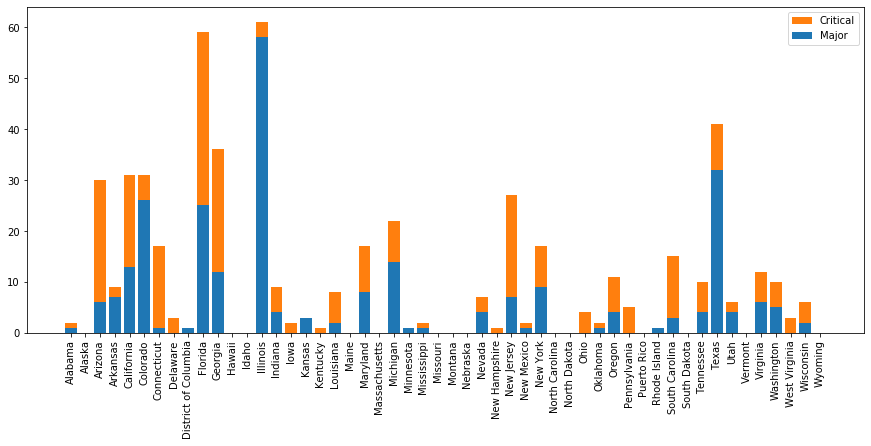

In [17]:
plt.figure(figsize=(15,6))
p3 = plt.bar(pop_df.index, pop_df['Major_Count'])
p4 = plt.bar(pop_df.index, pop_df['Critical_Count'], bottom=pop_df['Major_Count'])
plt.xticks(rotation=90)
plt.legend((p4[0], p3[0]), ('Critical', 'Major'))
plt.show()

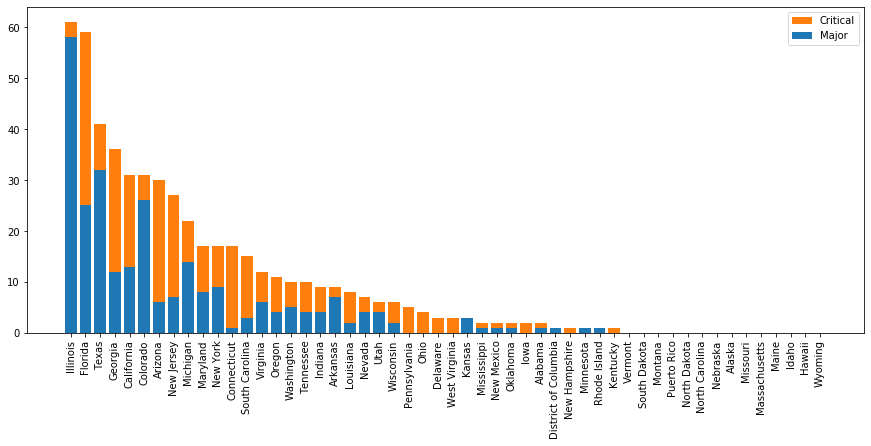

In [18]:
plt.figure(figsize=(15,6))
p1 = plt.bar(count_sorted_pop_df.index, count_sorted_pop_df['Major_Count'])
p2 = plt.bar(count_sorted_pop_df.index, count_sorted_pop_df['Critical_Count'], bottom=count_sorted_pop_df['Major_Count'])
plt.xticks(rotation=90)
plt.legend((p2[0], p1[0]), ('Critical', 'Major'))
plt.show()

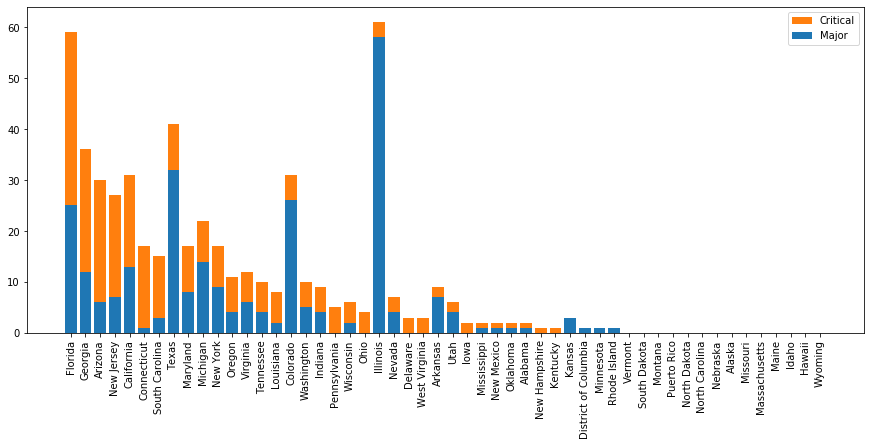

In [19]:
count_sorted_pop_df.sort_values(by=['Critical_Count','Major_Count'], ascending=False,  inplace=True)
plt.figure(figsize=(15,6))
p1 = plt.bar(count_sorted_pop_df.index, count_sorted_pop_df['Major_Count'])
p2 = plt.bar(count_sorted_pop_df.index, count_sorted_pop_df['Critical_Count'], bottom=count_sorted_pop_df['Major_Count'])
plt.xticks(rotation=90)
plt.legend((p2[0], p1[0]), ('Critical', 'Major'))
plt.show()

<BarContainer object of 24 artists>

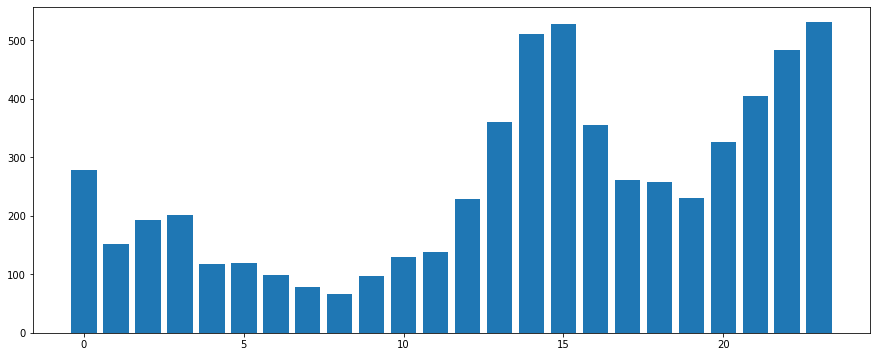

In [20]:
#turn to time of day to datetime
datetimeconv=[]
time_of_day=[]


for times in range(0,len(acc_df)):
    datetimeconv.append(datetime.strptime(str(acc_df['Start_time'][times]), '%Y-%m-%d %X'))
    time_of_day.append(datetimeconv[times].hour)

                       
timeofdaydict=dict(Counter(time_of_day))

keyss=[]
valuess=[]
for key in timeofdaydict:
    keyss.append(key)
    valuess.append(timeofdaydict[key])
    
f, ax = plt.subplots(figsize=(15,6))
plt.bar(keyss,valuess)
